In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
titanic_df=pd.read_csv('C:/Users/ind06/Downloads/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
#학습 데이터 정보
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
#null값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수  0


In [6]:
#cf 
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
#문자열 피처들의 값 분류
print('Sex 값 분포 : \n', titanic_df['Sex'].value_counts())
print('\nCabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\nEmbarked 값 분포 : \n', titanic_df['Embarked'].value_counts())

Sex 값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

Cabin 값 분포 : 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
C22 C26          3
              ... 
E34              1
E40              1
B41              1
E63              1
B42              1
Name: Cabin, Length: 148, dtype: int64

Embarked 값 분포 : 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임. (이 시절에는 지금보다도 부자와 가난한 사람에 대한 차별이 더 있던 시절이었기에 일등실에 투숙한 사람이 삼등실에 투숙한 사람보다 더 살아날 확률이 높았을 것.)
Cabin 속성의 경우 앞 문자만 추출.

In [8]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


머신러닝 알고리즘을 적용해 예측을 수행하기 전에 데이터를 먼저 탐색.
1) 어떤 유형의 승객이 생존 확률이 높았는가? (바다에서 사고가 날 경우 여성과 아이들, 노약자가 제일 먼저 구조 대상)

In [9]:
#성별에 따른 생존자 수 비교
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

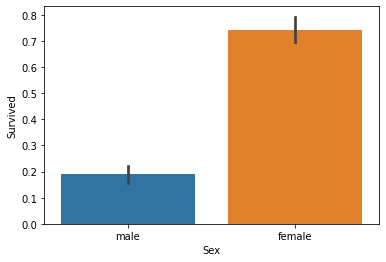

In [10]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

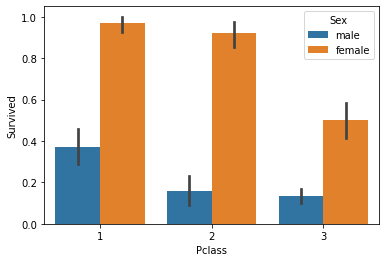

In [11]:
# 부자와 가난한 사람 간의 생존 확률 (부를 측정할 수 있는 속성 : 객실 등급+성별)
# 성별에 따라 생존 확률이 차이가 남이 확실하므로 성별과 같이 고려
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [16]:
# 나이에 따른 생존 확률 
def get_category(age): 
    cat=''
    if age<=-1 : cat='Unknown'
    elif age<=5 : cat='Baby'
    elif age<=12 : cat='Child'
    elif age<=18 : cat='Teenager'
    elif age<=25 : cat='Student'
    elif age<=35 : cat='Young Adult'
    elif age<=60 : cat='Adult'
    else : cat='Elderly'
        
    return cat

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

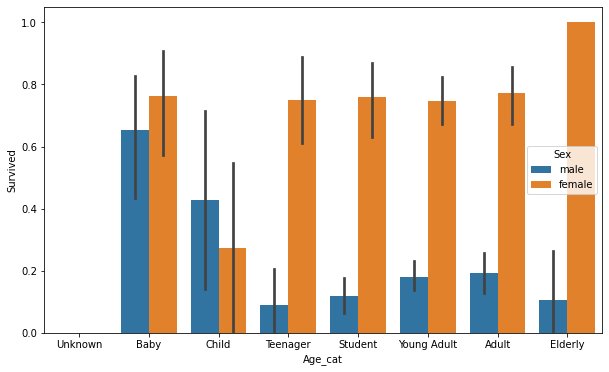

In [17]:
plt.figure(figsize=(10,6)) #막대그래프의 크기 figure를 더 크게 설정
group_names=['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly'] #x축의 값을 순차적으로 표현하기 위해
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)

분석 결과 Sex, Age, Plcass 등의 중요하게 생존을 좌우하는 피처임을 어느정도 확인.

이제 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환 -> LabelEncoder 이용

In [18]:
#레이블 인코딩 : fit, transform
from sklearn import preprocessing

def encode_features(dataDF):
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [19]:
# 지금까지 피처를 가공한 내용을 정리하고 이를 함수로 만들어 쉽게 재사용할 수 있도록.

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[1:]
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le=preprocessing.LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df=fillna(df)
    df=drop_features(df)
    df=format_features(df)
    return df

In [20]:
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df=pd.read_csv('C:/Users/ind06/Downloads/train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived', axis=1)

X_titanic_df=transform_features(X_titanic_df)

In [21]:
# 테스트 데이터 세트 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [22]:
from sklearn.tree import DecisionTreeClassifier #결정 트리
from sklearn.ensemble import RandomForestClassifier #랜덤 포레스트
from sklearn.linear_model import LogisticRegression #로지스틱 회귀
from sklearn.metrics import accuracy_score

In [23]:
# 결정트리, 랜덤 포레스트, 로지스틱 회귀를 위한 사이킷럿 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.782123
RandomForestClassifier 정확도 : 0.854749
LogisticRegression 정확도 : 0.854749


C:\Users\ind06\anaconda3\envs\test\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [24]:
# 교차 검증으로 결정 트리 모델 평가 : KFold 클래스
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5): 
    kfold=KFold(n_splits=folds) #폴드 세트를 5개인 KFold 객체를 생성
    score=[] #폴드 수만큼 예측 결과 저장을 위한 리스트 객체 생성
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)): #KFold 교차 검증 수행
        X_train, X_test=X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test=y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train) #classifier 학습, 예측, 정확도 계산
        predictions=clf.predict(X_test)
        accuracy=accuracy_score(y_test, predictions)
        score.append(accuracy)
        print('교차 검증 {0} 정확도 : {1:4f}'.format(iter_count, accuracy))
        
    
    mean_score=np.mean(score) #5개 fold에서의 평균 정확도 계산
    print('평균 정확도 : {0:4f}'.format(mean_score))
    
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.731844
교차 검증 1 정확도 : 0.758427
교차 검증 2 정확도 : 0.803371
교차 검증 3 정확도 : 0.735955
교차 검증 4 정확도 : 0.780899
평균 정확도 : 0.762099


In [25]:
# 교차 검증으로 결정 트리 모델 평가 : cross_val_score()
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.731844
교차 검증 1 정확도 : 0.758427
교차 검증 2 정확도 : 0.803371
교차 검증 3 정확도 : 0.764045
교차 검증 4 정확도 : 0.780899
평균 정확도 : 0.767717


In [26]:
# GridSerchCV를 이용하여 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측 성능 찾기
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도 : {0:4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
acuracy=accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.796513
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.780899
